Reading my HR monitor output

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
import pandas


In [11]:
datasetti = pandas.read_csv('data/My_name_2017-07-22_09-19-30.csv')

In [12]:
datasetti.head()

,Name,Sport,Date,Start time,Duration,Total distance (km),Average heart rate (bpm),Average speed (km/h),Max speed (km/h),Average pace (min/km),...,Running index,Training load,Ascent (m),Descent (m),Notes,Height (cm),Weight (kg),HR max,HR sit,VO2max
0,My name,RUNNING,22.07.2017,09:19:30,01:29:30,12.71,125,8.5,12.8,07:03,...,53.0,131.0,303.0,303.0,NaN,160.0,54.0,169.0,49.0,43.0
1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:00:00,82,3.3,18:11,0,1073,NaN,0.1,29.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:00:01,82,3.3,18:11,0,1073,NaN,0.1,29.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,00:00:02,82,3.6,16:40,0,1073,NaN,0.1,29.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
datasetti.tail()

,Name,Sport,Date,Start time,Duration,Total distance (km),Average heart rate (bpm),Average speed (km/h),Max speed (km/h),Average pace (min/km),...,Running index,Training load,Ascent (m),Descent (m),Notes,Height (cm),Weight (kg),HR max,HR sit,VO2max
5365,NaN,01:29:23,106,5.8,10:21,59,1073,NaN,12702.1,23.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5366,NaN,01:29:24,106,5.5,10:55,58,1073,NaN,12703.1,23.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5367,NaN,01:29:25,106,5.3,11:19,58,1073,NaN,12704.1,23.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5368,NaN,01:29:26,105,5.2,11:32,57,1073,NaN,12705.3,23.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5369,NaN,01:29:27,104,4.9,12:15,57,1073,NaN,12706.3,23.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like there are two headers, I want to use the 3rd line in the actual file as a header, hence using the option header in the command. NB that it counts the line from 0, so taking the 3rd line requires header=2:

In [16]:
readings = pandas.read_csv('data/My_name_2017-07-22_09-19-30.csv', header=2)

In [17]:
readings.head()

,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1.0,00:00:00,82,3.3,18:11,0,1073,NaN,0.1,29.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,00:00:01,82,3.3,18:11,0,1073,NaN,0.1,29.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,00:00:02,82,3.6,16:40,0,1073,NaN,0.1,29.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:00:03,82,4.1,14:38,0,1073,NaN,0.7,29.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,00:00:04,82,4.5,13:20,0,1073,NaN,1.9,29.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


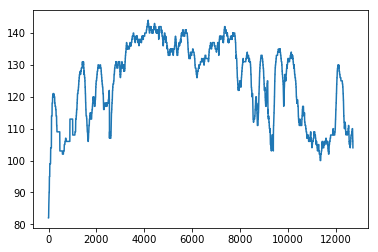

In [28]:
dist = readings['Distances (m)']
hb = readings['HR (bpm)']
#print(hb)

plt.plot(dist, hb)
plt.show()


To use time in the x axis, I need to convert the time reading of the format hh:mm:ss to something that can be used as x axis values, i.e either hours, minutes or seconds:

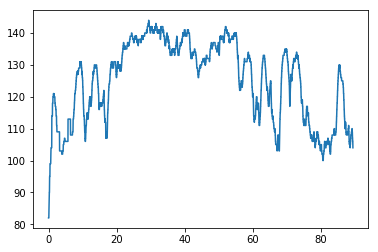

In [45]:
times = readings['Time']
secs = times.str.split(':').apply(lambda x: int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2]))
#print(secs)
mins = times.str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2])/60)
#print(mins)

plt.plot(mins, hb)
plt.show()





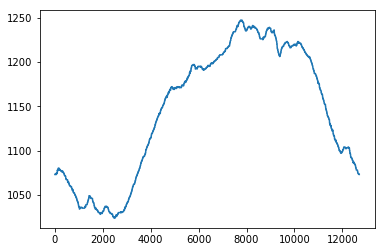

In [46]:
alt = readings['Altitude (m)']
plt.plot(dist, alt)
plt.show()